Project: Student Performance Predictor (UCI)
Name: Hamza Asif | Roll No: 23-AI-93

In [1]:
from google.colab import files
uploaded = files.upload()


Saving student+performance.zip to student+performance.zip


In [2]:
import zipfile

zip_path = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Extracted:", zip_ref.namelist())


Extracted: ['.student.zip_old', 'student.zip']


In [3]:
inner_zip_path = "dataset/student.zip"
with zipfile.ZipFile(inner_zip_path, 'r') as nested_zip:
    nested_zip.extractall("dataset/student_data")

print("Nested Extracted:", nested_zip.namelist())


Nested Extracted: ['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']


In [4]:
import pandas as pd
mat = pd.read_csv("dataset/student_data/student-mat.csv", sep=";")
print(mat.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


Linear Regression -> MSE: 3.070, R2: 0.801


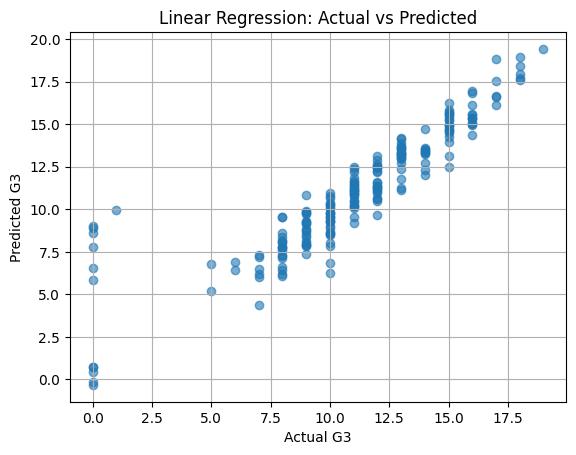


Logistic Regression Results:
Accuracy: 0.861
Precision: 0.87
Recall: 0.946
[[ 39  21]
 [  8 141]]


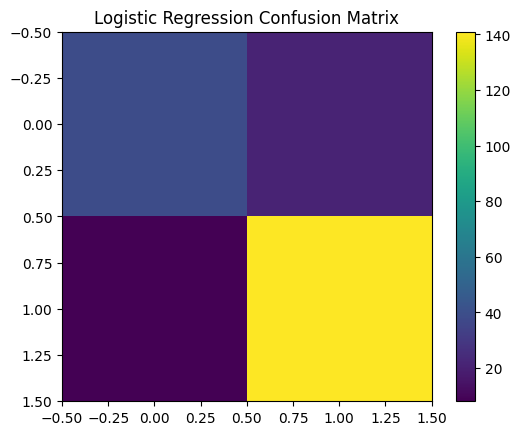


Decision Tree Results:
Accuracy: 0.856
Precision: 0.865
Recall: 0.946
[[ 38  22]
 [  8 141]]


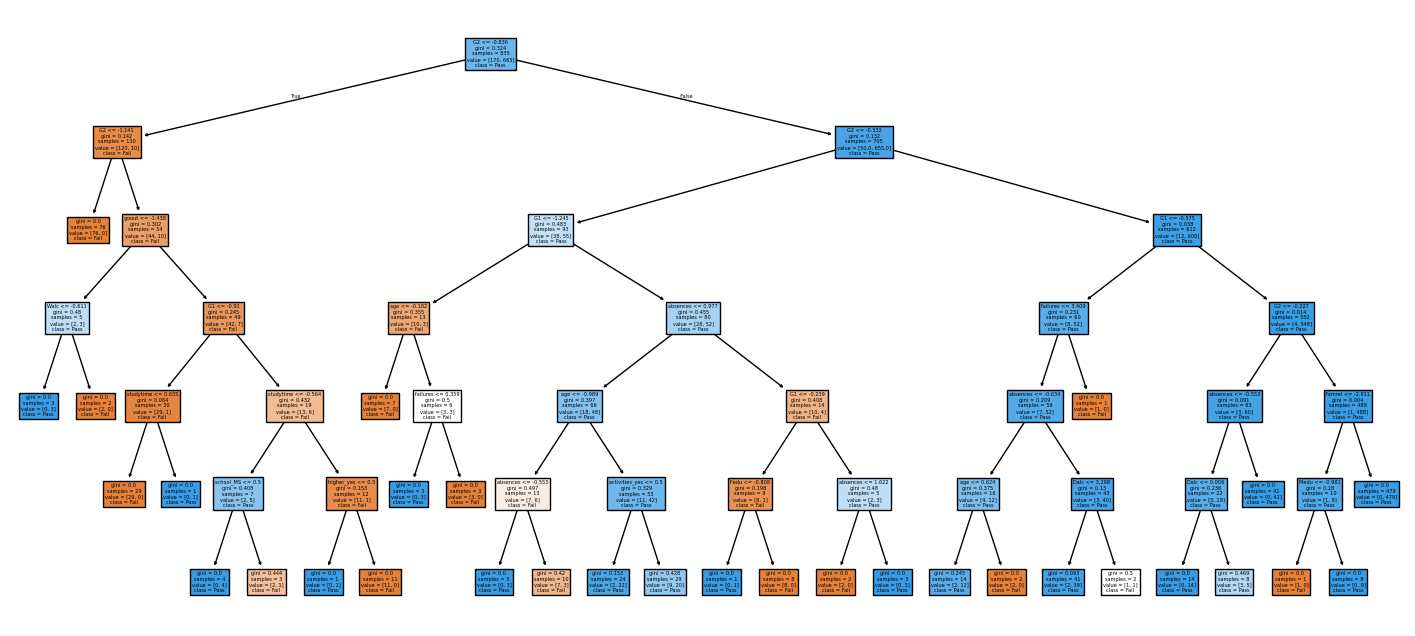

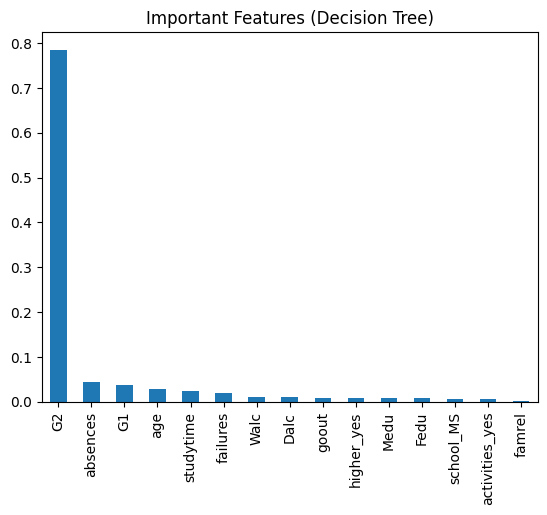


Summary:
Linear Regression R2: 0.801
Logistic Regression Accuracy: 0.861
Decision Tree Accuracy: 0.856


In [15]:
# Project: Student Performance Predictor (UCI)
# Name: Hamza Asif | Roll No: 23-AI-93

import os
import io
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Dataset Load (UCI links)
url_mat = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
url_por = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv"

def load_csv_from_url(url, sep=';'):
    s = requests.get(url).content
    return pd.read_csv(io.BytesIO(s), sep=sep)

math_df = load_csv_from_url(url_mat)
por_df = load_csv_from_url(url_por)

# Combine both datasets and add subject label
math_df['subject'] = 'math'
por_df['subject'] = 'por'
df = pd.concat([math_df, por_df], axis=0, ignore_index=True)

# Regression target (G3) and Classification target (Pass/Fail)
df['G3'] = df['G3'].astype(int)
df['pass_fail'] = (df['G3'] >= 10).astype(int)

# Feature selection (numeric and categorical)
numeric_feats = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']
cat_feats = ['sex','school','address','famsize','Pstatus','guardian','paid','activities','higher','internet','subject']

numeric_feats = [c for c in numeric_feats if c in df.columns]
cat_feats = [c for c in cat_feats if c in df.columns]

X_num = df[numeric_feats].fillna(df[numeric_feats].mean())
X_cat = pd.get_dummies(df[cat_feats], drop_first=True)

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

X = pd.concat([X_num_scaled, X_cat], axis=1)
y_reg = df['G3']
y_clf = df['pass_fail']

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_r, y_train_r)
y_pred_r = lr_model.predict(X_test_r)

print(f"Linear Regression -> MSE: {mean_squared_error(y_test_r, y_pred_r):.3f}, R2: {r2_score(y_test_r, y_pred_r):.3f}")

plt.scatter(y_test_r, y_pred_r, alpha=0.6)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Logistic Regression Classification
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)
y_pred_log = log_model.predict(X_test_c)

print("\nLogistic Regression Results:")
print("Accuracy:", round(accuracy_score(y_test_c, y_pred_log),3))
print("Precision:", round(precision_score(y_test_c, y_pred_log),3))
print("Recall:", round(recall_score(y_test_c, y_pred_log),3))
print(confusion_matrix(y_test_c, y_pred_log))

plt.imshow(confusion_matrix(y_test_c, y_pred_log))
plt.title("Logistic Regression Confusion Matrix")
plt.colorbar()
plt.show()

# Decision Tree Classification
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train_c, y_train_c)
y_pred_dt = dt_model.predict(X_test_c)

print("\nDecision Tree Results:")
print("Accuracy:", round(accuracy_score(y_test_c, y_pred_dt),3))
print("Precision:", round(precision_score(y_test_c, y_pred_dt),3))
print("Recall:", round(recall_score(y_test_c, y_pred_dt),3))
print(confusion_matrix(y_test_c, y_pred_dt))

plt.figure(figsize=(18,8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Fail','Pass'], filled=True)
plt.show()

# Feature Importance
feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
feat_imp.plot(kind='bar')
plt.title("Important Features (Decision Tree)")
plt.show()

# Summary
print("\nSummary:")
print("Linear Regression R2:", round(r2_score(y_test_r, y_pred_r),3))
print("Logistic Regression Accuracy:", round(accuracy_score(y_test_c, y_pred_log),3))
print("Decision Tree Accuracy:", round(accuracy_score(y_test_c, y_pred_dt),3))
